In [9]:
#Data Cleaning

In [630]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [632]:
img = cv2.imread('elon-musk2.webp')
img.shape
#RGB coordinations values

(1200, 1800, 3)

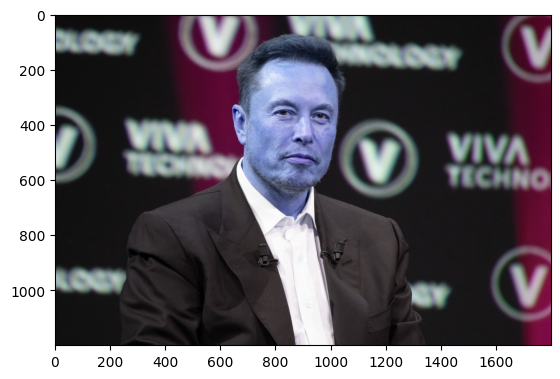

In [633]:
plt.imshow(img)

In [634]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
#Gray coordinations values

(1200, 1800)

In [635]:
gray

array([[13, 13, 12, ..., 97, 94, 94],
       [13, 12, 12, ..., 99, 99, 96],
       [13, 10, 12, ..., 99, 98, 96],
       ...,
       [16, 19, 18, ..., 39, 44, 45],
       [18, 19, 19, ..., 44, 44, 46],
       [19, 27, 28, ..., 36, 40, 48]], dtype=uint8)

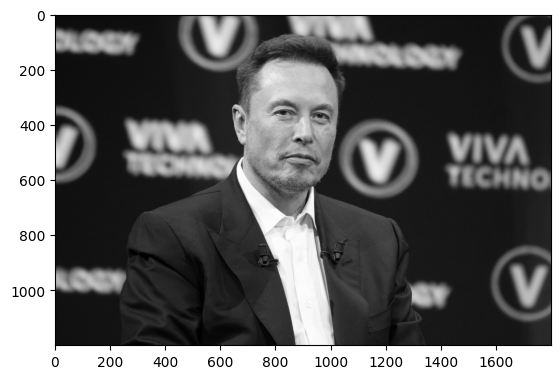

In [636]:
plt.imshow(gray, cmap='gray')

In [637]:
#with open cv we detect faces by haar cascades

In [638]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
#returns the dimension of the face

array([[691, 202, 402, 402]])

In [639]:
(x,y,w,h) = faces[0]
x,y,w,h

(691, 202, 402, 402)

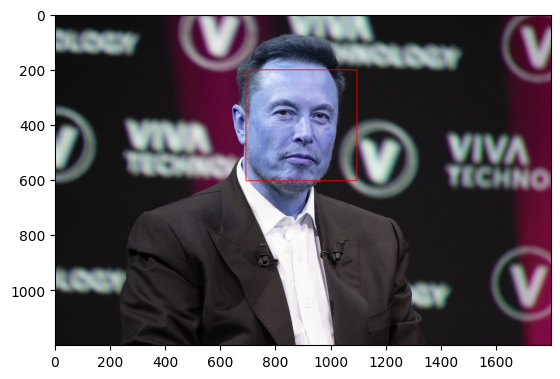

In [640]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
#draw a rectangle around the face

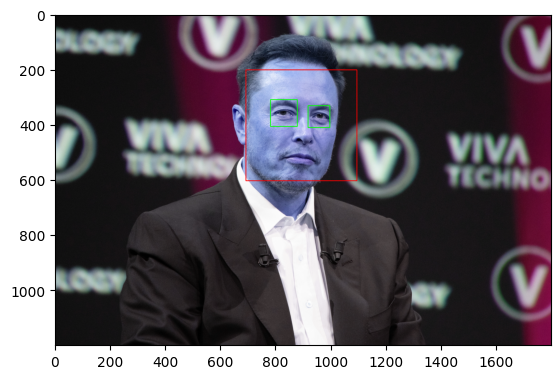

In [641]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
#draw rectangle around the eye

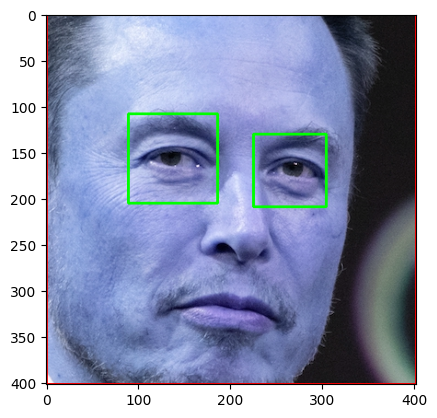

In [642]:

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [643]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

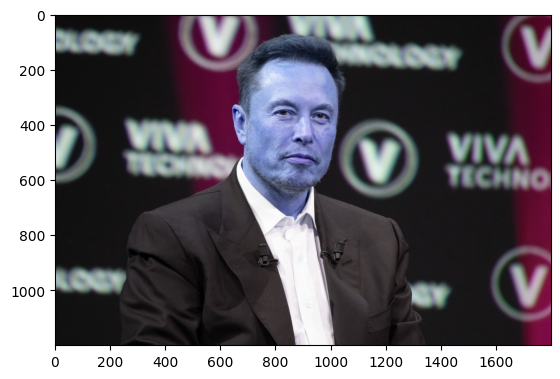

In [646]:
original_image = cv2.imread('elon-musk2.webp')
plt.imshow(original_image)

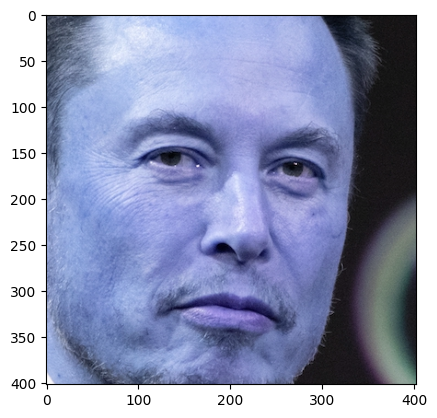

In [649]:

cropped_image = get_cropped_image_if_2_eyes('elon-musk2.webp')
plt.imshow(cropped_image)

In [648]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped_dataset/"

In [220]:
#function that stores all the names directeries from my dataset  in the 
#images directeries variables
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [221]:
img_dirs

['./dataset/cropped_dataset',
 './dataset/Elon Mask',
 './dataset/Larry Page',
 './dataset/Mark Zuckerberg',
 './dataset/sergey brin',
 './dataset/Steve Jobs']

In [222]:
#img_dirs.pop(0)

#print(img_dirs)

In [223]:
#function that generates the cropped dataset folder

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [224]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped_dataset/Elon Mask
Generating cropped images in folder:  ./dataset/cropped_dataset/Larry Page
Generating cropped images in folder:  ./dataset/cropped_dataset/Mark Zuckerberg
Generating cropped images in folder:  ./dataset/cropped_dataset/sergey brin
Generating cropped images in folder:  ./dataset/cropped_dataset/Steve Jobs


In [225]:
#feature engineering utilizing the technique wavelet transform which extract the features from faces

In [226]:
#wavelet transform
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

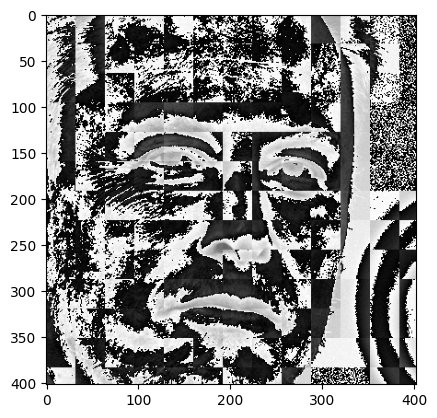

In [227]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [598]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Elon Mask': ['./dataset/cropped_dataset/Elon Mask\\Elon Mask1.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask10.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask11.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask12.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask13.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask14.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask15.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask16.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask17.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask18.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask19.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask20.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask21.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask22.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask23.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask24.png',
  './dataset/cropped_dataset/Elon Mask\\Elon Mask25.png',
  

In [599]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon Mask': 0,
 'Larry Page': 1,
 'Mark Zuckerberg': 2,
 'sergey brin': 3,
 'Steve Jobs': 4}

In [600]:
#to train our classifier,we use the raw images in cropped_dataset along with wavelet trasformed images
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))#the rew image
        img_har = w2d(img,'db1',5)#the wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #scalled_raw_img:reshape for 3D to 2D with a one column(3072,1)
        #scalled_img_har:reshape for 2D to 2D with a one column(1024,1)
        #np.vstack:combine the 2images vertically:size=(3072+1024,1)=(4096,1)
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [601]:
len(X[0])

4096

In [602]:
X[0]

array([[  6],
       [ 21],
       [ 35],
       ...,
       [112],
       [111],
       [211]], dtype=uint8)

In [603]:
y[0]

0

In [604]:
len(X)

196

In [605]:
#training model

In [606]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [607]:
#pip install scikit-learn


In [608]:
import numpy as np

X = np.array(X)


In [609]:
# Assurez-vous que X est à deux dimensions
if len(X.shape) > 2:
    X = X.reshape((X.shape[0], -1))

# Fractionnez les données
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Créez et entraînez le pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)

# Évaluez le modèle
score = pipe.score(X_test, y_test)
print("Score:", score)


Score: 0.8367346938775511


In [610]:
len(X_test)


49

In [611]:
#recall=how many items is predicted true accorfing to the global

In [612]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.62      0.77         8
           2       0.69      1.00      0.82         9
           3       0.92      0.86      0.89        14
           4       0.70      0.88      0.78         8

    accuracy                           0.84        49
   macro avg       0.86      0.83      0.83        49
weighted avg       0.87      0.84      0.84        49



In [613]:
#Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [614]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [615]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [616]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
#it is a validation set:tell the performance of each model dealing with your dataset

C:\Users\Zaïneb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Zaïneb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Zaïneb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Zaïneb\AppData\Local\Programs\Pyth

,model,best_score,best_params
0,svm,0.781149,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.462989,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.782299,{'logisticregression__C': 1}


In [617]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [618]:
#it is the test set
best_estimators['svm'].score(X_test,y_test)

0.9387755102040817

In [620]:
best_estimators['random_forest'].score(X_test,y_test)

0.7551020408163265

In [619]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9183673469387755

In [621]:
best_clf = best_estimators['svm']

In [622]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  7,  0,  1,  0],
       [ 0,  0,  9,  0,  0],
       [ 1,  0,  1, 12,  0],
       [ 0,  0,  0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

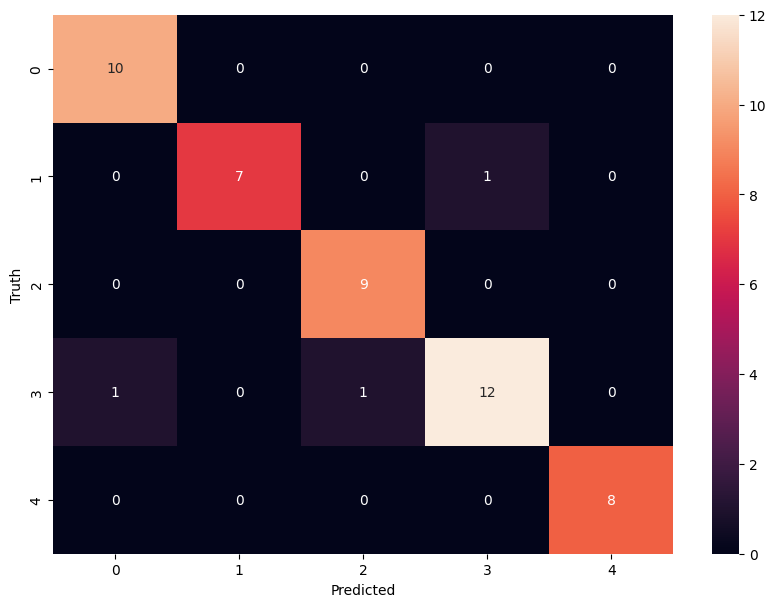

In [623]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [624]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon Mask': 0,
 'Larry Page': 1,
 'Mark Zuckerberg': 2,
 'sergey brin': 3,
 'Steve Jobs': 4}

In [625]:
#save the trained model

In [626]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [627]:
#Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))